Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [1]:
#Euler Problem 3
def largest_prime_factor(n):
    factor = 2
    while factor * factor <= n:
        if n % factor == 0:
            n //= factor
        else:
            factor += 1
    return n

number = 600851475143
print(largest_prime_factor(number))

6857


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

In [22]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Test Data
Mean Absolute Error: 0.5340867694760636
Root Mean Squared Error: 0.7260657030468503
R² Score: 0.5957134681536271


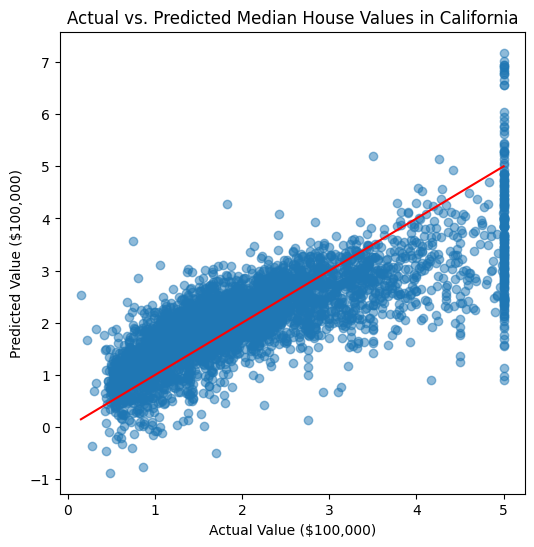

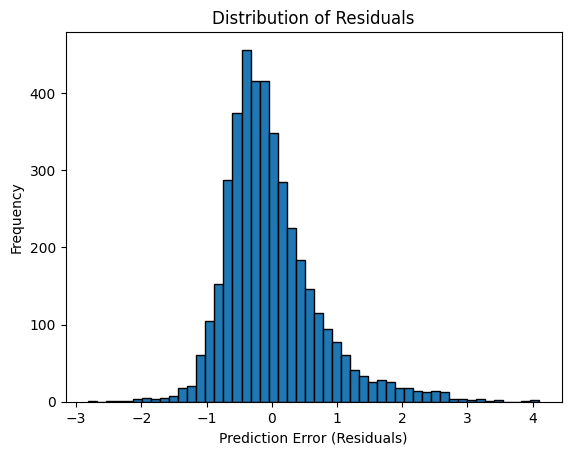

            Coefficients
MedInc          0.436693
HouseAge        0.009436
AveRooms       -0.107322
AveBedrms       0.645066
Population     -0.000004
AveOccup       -0.003787
Latitude       -0.421314
Longitude      -0.434514


In [24]:
# Regression Model
reg = LinearRegression().fit(X,y)
y_pred = reg.predict(X_test)

#Basic Analysis
#Test Data
print("Test Data")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

#Training Data
# print("Training Data")
# print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred))
# print("Root Mean Squared Error:", root_mean_squared_error(y_train, y_pred))
# print("R² Score:", r2_score(y_train, y_pred))

#Visulization and Analysis

#Scatterplot - Edit
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-")
plt.xlabel("Actual Value ($100,000)")
plt.ylabel("Predicted Value ($100,000)")
plt.title("Actual vs. Predicted Median House Values in California")
plt.show()

#Histogram of Model Error

#Residuals
residuals = y_test - y_pred

#Histogram Plot
plt.hist(residuals, bins = 50, edgecolor="black")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#Predictor Variable Importance
coefficents = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
print(coefficents)

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

In [36]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [37]:
#SVM Model
model = SVC()
model.fit(X_train_std, y_train)

#Predictions
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
y_test_proba = model.predict_proba(X_test_std)[:, 1]

#Analysis
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)
avg_precision = average_precision_score(y_test, y_test_proba)

AttributeError: This 'SVC' has no attribute 'predict_proba'